<a href="https://www.kaggle.com/joannakonka/py-drug-classification?scriptVersionId=89523474" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


In [2]:
my_data=pd.read_csv('/kaggle/input/drug-classification/drug200.csv')
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
my_data.shape

(200, 6)

In [4]:
my_data['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

"X" as the Feature matrix:

In [5]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [6]:
# we will convert the strings in columns to floats for further analysis:
from sklearn import preprocessing

# tranform "F" and "M" to binary:
sex = preprocessing.LabelEncoder()
sex.fit(['F','M'])
X[:,1] = sex.transform(X[:,1]) 

# transform BP col to binary:
BP = preprocessing.LabelEncoder()
BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = BP.transform(X[:,2])

# tranform Cholesterol column to binary:
chol = preprocessing.LabelEncoder()
chol.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,3] = chol.transform(X[:,3])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [7]:
# We will normalize X array:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.29159102, -1.040833  , -1.11016894, -0.97043679,  1.28652212],
       [ 0.16269866,  0.96076892,  0.10979693, -0.97043679, -0.4151454 ],
       [ 0.16269866,  0.96076892,  0.10979693, -0.97043679, -0.82855818],
       [-0.988614  , -1.040833  ,  1.32976279, -0.97043679, -1.14996267],
       [ 1.0110343 , -1.040833  ,  0.10979693, -0.97043679,  0.27179427]])

"y" as the response vector, i.e. classification target:

In [8]:
y = my_data["Drug"]
y[0:5]

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [9]:
#let's separate the dataset to test and train subsets:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
print('X_trainset is {}'.format(X_trainset.shape),'and y_trainset is {}'.format(y_trainset.shape))
print('X_testset is {}'.format(X_testset.shape),'and y_testset is {}'.format(y_testset.shape))

X_trainset is (140, 5) and y_trainset is (140,)
X_testset is (60, 5) and y_testset is (60,)


Now let's do models with K-nearest neighbours (KNN), 
Decision Tree, SVM, and Logistic Regression and compare their accuracy:

KNN

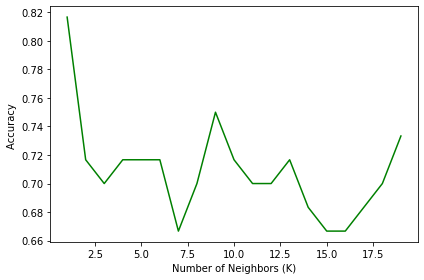

The best accuracy was with 0.8166666666666667 with k= 1


In [10]:
#K nearest neighbor (KNN) modelling:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

#Find best K:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    y_pred=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, y_pred)

    std_acc[n-1]=np.std(y_pred==y_testset)/np.sqrt(y_pred.shape[0])

mean_acc

#Plot the model accuracy for a different number of neighbors.
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [11]:
# KNN for k=1
k = 1
#Train model and predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)

y_pred_knn = neigh.predict(X_testset)

Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier #import DecisionTreeClassifier
#Train model and predict  
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4) # check criterion="gini" if it increases accuracy
drugTree.fit(X_trainset,y_trainset)

predTree = drugTree.predict(X_testset)

SVM

In [13]:
from sklearn import svm #import svm

# Train model and predict
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_trainset, y_trainset) 

y_pred_svm = clf.predict(X_testset)

Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=1, solver='liblinear').fit(X_trainset,y_trainset)
#‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers.
y_pred_logreg = LR.predict(X_testset)
y_pred_logreg_prob = LR.predict_proba(X_testset)

Let's evaluate all the models:

In [15]:
#import jaccard_score, f1_score and log_loss

from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [16]:
# KNN model:

#Jaccard index
average_jaccard_score_knn = jaccard_score(y_testset, y_pred_knn, average='weighted')
print('Weighted Jaccard score is', average_jaccard_score_knn)

#f1_score:
f1_score_knn = f1_score(y_testset, y_pred_knn, average='weighted') 
print("f1 score is", f1_score_knn)

Weighted Jaccard score is 0.6970185185185185
f1 score is 0.8118784368784371


In [17]:
# Decision Tree:

# Jaccard index
average_jaccard_score_tree = jaccard_score(y_testset, predTree, average='weighted')
print('Weighted Jaccard score is', average_jaccard_score_tree)

#f1_score:
f1_score_tree = f1_score(y_testset, predTree, average='weighted') 
print("f1 score is", f1_score_tree)

Weighted Jaccard score is 0.967391304347826
f1 score is 0.9833152664859981


In [18]:
# SVM

# Jaccard index
average_jaccard_score_svm = jaccard_score(y_testset, y_pred_svm, average='weighted')
print('Weighted Jaccard score is', average_jaccard_score_svm)

#f1_score:
f1_score_svm = f1_score(y_testset, y_pred_svm, average='weighted') 
print("f1 score is", f1_score_svm)

Weighted Jaccard score is 0.8500788161114249
f1 score is 0.916951219512195


In [19]:
# Logistic Regression

# Jaccard index
average_jaccard_logreg = jaccard_score(y_testset, y_pred_logreg, average='weighted')
print('Weighted Jaccard score is', average_jaccard_logreg)

#f 1_score:
f1_score_logreg = f1_score(y_testset, y_pred_logreg, average='weighted') 
print("f1 score is", f1_score_logreg)

# log_loss
log_regll = log_loss(y_testset, y_pred_logreg_prob)
print("log_loss probability is", log_regll)

Weighted Jaccard score is 0.851022126022126
f1 score is 0.9157256412680407
log_loss probability is 0.5548235536203061


Evaluation table for different models

In [20]:
data = {'Model':['KNN','Decision Tree','SVM','Logistic Regression'],
      'Jaccard Score':[average_jaccard_score_knn, average_jaccard_score_tree, average_jaccard_score_svm, average_jaccard_logreg],
      'F1-score':[f1_score_knn,f1_score_tree,f1_score_svm,f1_score_logreg],
      'LogLoss':['NA','NA','NA',log_regll]}
df = pd.DataFrame(data=data)
df.set_index('Model', inplace=True, drop=True)
df

,Jaccard Score,F1-score,LogLoss
Model,,,
KNN,0.697019,0.811878,NA
Decision Tree,0.967391,0.983315,NA
SVM,0.850079,0.916951,NA
Logistic Regression,0.851022,0.915726,0.554824


In [21]:
print("Highest Jaccard score for", df.index[df['Jaccard Score'] == max(df['Jaccard Score'])])
print("Highest F1-score for", df.index[df['F1-score'] == max(df['F1-score'])])

Highest Jaccard score for Index(['Decision Tree'], dtype='object', name='Model')
Highest F1-score for Index(['Decision Tree'], dtype='object', name='Model')


Best model for "Decision Tree"